In [ ]:
#part 1 - cephieds

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lomb-Scargle Periodorgram:
from astropy.timeseries import LombScargle, BoxLeastSquares

# FITS load
from astropy.io import fits

In [23]:
time, I_mag, e_I_mag = np.genfromtxt("tutorials//Tutorial_12//OGLE-LMC-CEP-0002.dat", unpack=True)

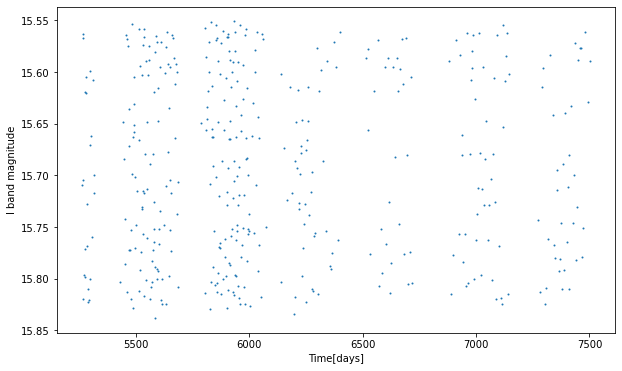

In [36]:
plt.figure(figsize = (10,6))
plt.scatter(time, I_mag, s = 1)
plt.xlabel("Time[days]")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()

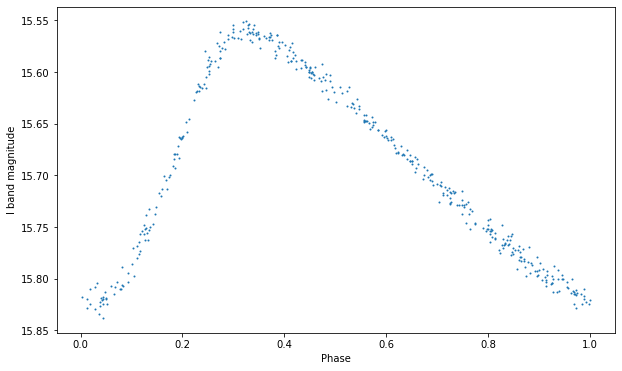

In [63]:
assumed_period = 3.11815
phase = np.remainder(time, assumed_period)/assumed_period
plt.figure(figsize = (10,6))
plt.scatter(phase, I_mag, s = 1)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()

Text(0, 0.5, 'Power')

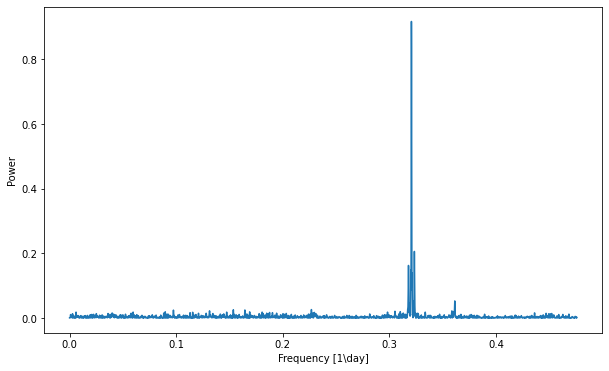

In [67]:
frequency, power = LombScargle(time, I_mag,e_I_mag).autopower()
plt.figure(figsize = (10,6))
plt.plot(frequency, power)
plt.xlabel('Frequency [1\day]')
plt.ylabel('Power')

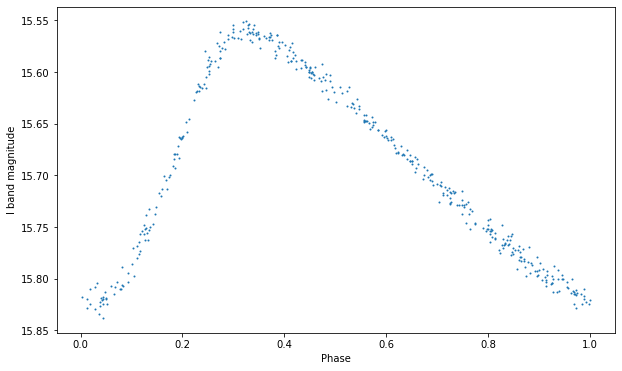

In [69]:
fundamental_freq = frequency[np.argmax(power)]
period = 1/fundamental_freq
phase = np.remainder(time, assumed_period)/assumed_period
plt.figure(figsize = (10,6))
plt.scatter(phase, I_mag, s = 1)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()

In [73]:
data = np.loadtxt("star_table.txt", dtype='str')


In [76]:
ind = np.where(data[:,4] != "-99.99")
I = data[ind,4].astype('f')
P = data[ind,5].astype('f')

Text(0.5, 1.0, 'Period Luminosity Relation for SMC Classical Cepheids')

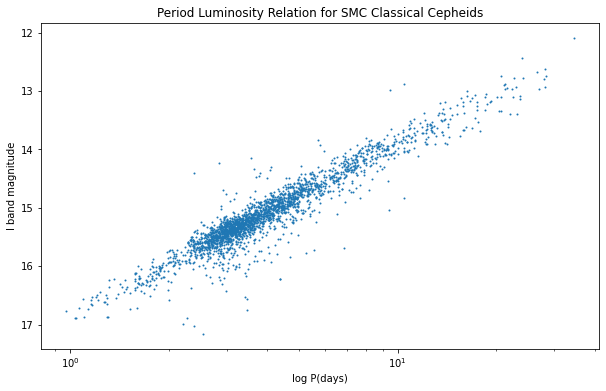

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(P, I, s=1)
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel('log P(days)')
plt.ylabel('I band magnitude')
plt.title('Period Luminosity Relation for SMC Classical Cepheids')

In [78]:
#part 2 - exoplanets


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from astropy.timeseries import BoxLeastSquares


In [80]:
data = fits.getdata("kplr010666592-2009131110544_slc.fits")

Text(0, 0.5, 'Flux [e/s]')

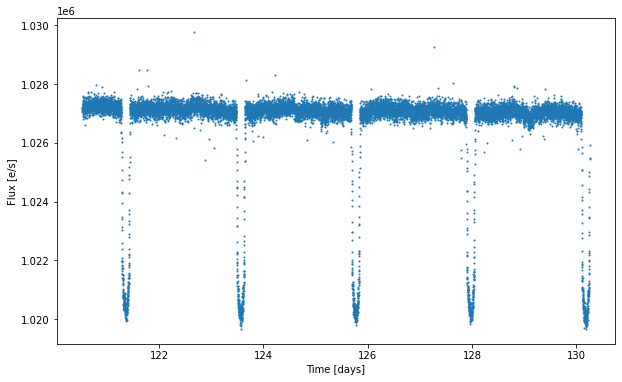

In [103]:
plt.figure(figsize = (10,6))
t = data['Time']
sap = data['sap_flux']
print(len(t))
plt.scatter(t,sap,s = 1)

plt.xlabel('Time [days]')
plt.ylabel('Flux [e/s]')

In [104]:
sel_nan = np.isnan(sap)


model = BoxLeastSquares(t[~sel_nan], sap[~sel_nan]) # ~ is the unary Not operator
periodogram = model.autopower(0.2)

Text(0, 0.5, 'Flux [e/s]')

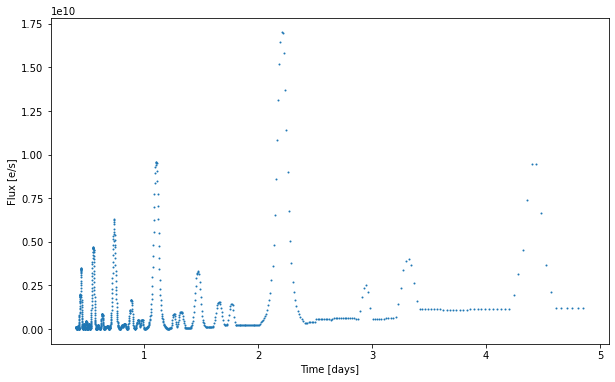

In [109]:
plt.figure(figsize = (10,6))
plt.scatter(periodogram.period,periodogram.power,s = 1)

plt.xlabel('Time [days]')
plt.ylabel('Flux [e/s]')

In [110]:
# part 3


In [111]:
hdu = fits.open('AS1A02_005T01_9000000948_06884cztM0_level2_common_clean.evt')

In [112]:
times = np.concatenate((hdu[1].data['Time'], hdu[2].data['Time'],
                        hdu[3].data['Time'], hdu[4].data['Time']))


Text(0, 0.5, '$counts\\ s^{-1}$')

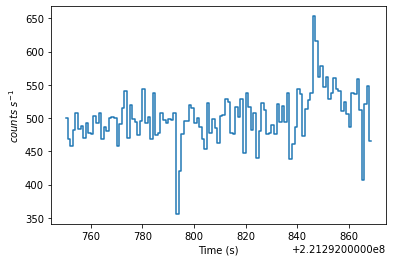

In [116]:
binsize = 1
# # Use this option to see the entire light curve for an orbit of the Satellite. 
# # The detectors are switched off above certain regions of the Earth, known as the South-Atlantic Anomaly
# tbins = np.arange(times.min(), times.max(), binsize)

# Use this data to see only some data containing the GRB. 
# These times are essentially number of seconds since Midnight, Jan 1, 2010.
tbins = np.arange(221292750.0, 221292870.0, binsize)

# Bin the time data
counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2

# Plot the light curve
plt.plot(bins, counts/binsize, drawstyle = 'steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')

Text(0.5, 1.0, 'Power law slope is -1.62')

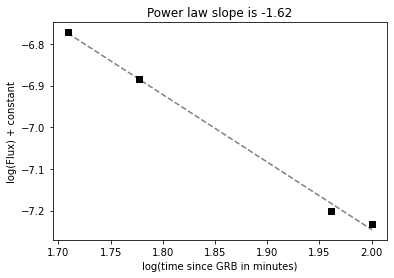

In [119]:
time = np.array([51.16,59.80,91.48,100.12])
mag = np.array([16.93,17.21,18.00,18.08])

from scipy.optimize import curve_fit

def line(x,m,c):
    return m*x + c

popt, perr = curve_fit(line, np.log10(time), mag/-2.5)

plt.scatter(np.log10(time), mag/-2.5, color='k', marker='s')
plt.plot(np.log10(time), line(np.log10(time), *popt), color='k', ls='--', alpha=0.5)
plt.xlabel('log(time since GRB in minutes)')
plt.ylabel('log(Flux) + constant')
plt.title(f'Power law slope is {popt[0]:2.2f}')
                       